In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from src import utils, nlp_utils
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords

from datetime import datetime

#nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# LDA - Wall Street Market

## Data Processing

In [ ]:
# wallstreet = pd.read_csv('data/wallstreet.csv')
# wall_nlp = wallstreet[['subforum', 'contentWithHTMLTag']].copy()
# wall_nlp['cleaned_content'] = wall_nlp['contentWithHTMLTag'].apply(lambda x: nlp_utils.clean_parse_text(x))
# wall_nlp['lemmatized_tokens'] = wall_nlp['contentWithHTMLTag'].apply(lambda x: nlp_utils.clean_tokenize_lemmatize(x))
# wall_nlp.to_csv('data/wall_nlp.csv', index=False)

--- 
# Model

In [2]:
wall_nlp = pd.read_csv('data/wall_nlp.csv')

In [6]:
# Must be even for visualizations.
n_topics = 20

cleaned_content = wall_nlp['lemmatized_tokens'].values
doc_topics, lda_model, vect = nlp_utils.convert_to_bow_and_fit_lda_model(cleaned_content, 10000, 0.15, n_topics, 'batch', 25, 3)

sorted_components = np.argsort(lda_model.components_, axis=1)[:, ::-1]
feat_names = np.array(vect.get_feature_names())

In [8]:
nlp_utils.print_topics(lda_model, vect, 10)


Topic #0:
quality high weed product the price stealth best gram strain

Topic #1:
use key using tor file click user it system the

Topic #2:
signup ref com ai the this lchudifyeqm4ldjj 2271281763 71713http site

Topic #3:
contact allowed external link please read not the by rules

Topic #4:
card use need know method like would carding one make

Topic #5:
fullz bank italian selling account service vouch check wallst4qihu6lvsa card

Topic #6:
the fake quality high de interested original gold if shop

Topic #7:
we order quality shipping product price mdma new euro free

Topic #8:
cashout bank guides 10 ssn records link extras money new

Topic #9:
pgp begin signature mirror use message bump end store signed

Topic #10:
utopia the we refund order with to reship be kush

Topic #11:
the to and you free fullz for deal listing with

Topic #12:
order like know would time good one make day people

Topic #13:
you btc wallet bitcoin good address code know see work

Topic #14:
id php x7bwsmcore5fmx

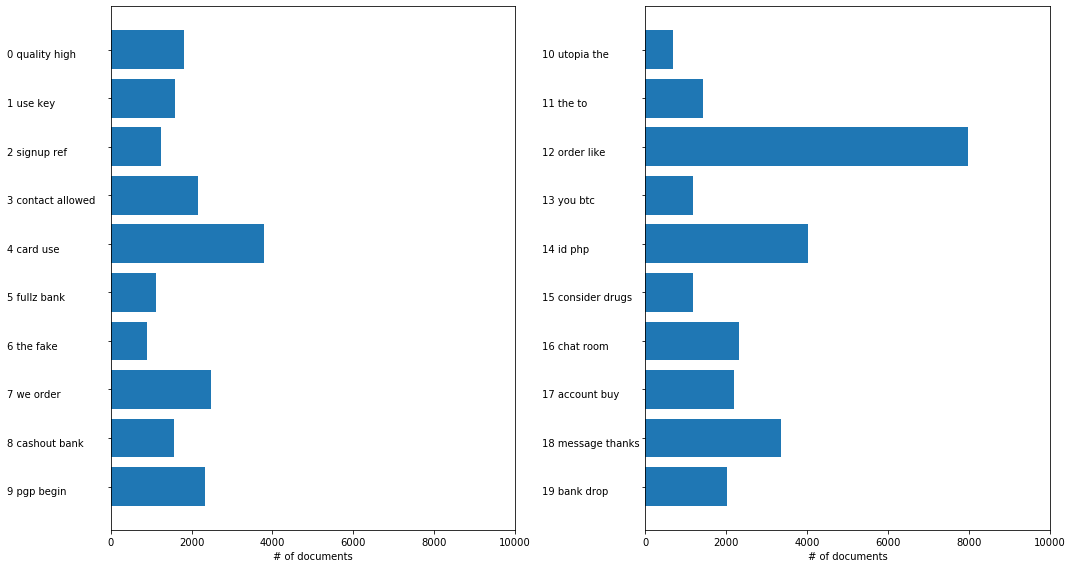

In [13]:
# Evaluate each topics (components) overall weight.
# Topics are named by the two most common words.

topics_per_plot = int(n_topics / 2)
barh_xlim = 10000
plot_pad = 100
fig_size = (15,8)
num_cols = 2

fig, ax = plt.subplots(1, 2, figsize=fig_size)

topic_names = ['{} {}'.format(i, ' '.join(words)) for i, words in enumerate(feat_names[sorted_components[:, :2]])]

for col in range(num_cols):
    start = col * topics_per_plot
    end = (col + 1) * topics_per_plot
    plot_width = np.sum(doc_topics, axis=0)[start:end]
    ax[col].barh(np.arange(topics_per_plot), plot_width)
    ax[col].set_yticks(np.arange(topics_per_plot))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, barh_xlim)
    ax[col].set_xlabel('# of documents')
    y_ax = ax[col].get_yaxis()
    y_ax.set_tick_params(pad=plot_pad)

plt.tight_layout();

In [28]:
# Order is based on topic popularity.
doc_term_matrix = np.matrix(lda_model.components_)
pyLDAvis.sklearn.prepare(lda_model, doc_term_matrix, vect)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.091737  0.054937       1        1  20.239586
4      0.107731  0.115326       2        1  10.297280
14    -0.322237 -0.000452       3        1   7.595985
1      0.043717  0.033437       4        1   6.139294
8      0.048602  0.125859       5        1   5.888911
7      0.107272 -0.156359       6        1   5.528904
0      0.125866 -0.141467       7        1   4.920885
16     0.010889  0.147501       8        1   4.275390
17     0.063683  0.092976       9        1   4.256109
19     0.033482  0.164059      10        1   3.842742
10     0.055898 -0.243056      11        1   3.691947
18    -0.131953  0.087092      12        1   3.459725
2      0.108937 -0.050814      13        1   3.378348
11     0.069457 -0.008874      14        1   3.114880
3     -0.124616  0.113294      15        1   3.034946
6      0.097375 -0.148893      16        1   2.987225
13    -0.015742  0.017365      17        1   2.157721
9     -0.339644 -0.188101      18        1   2.061943
15     0.017168 -0.124326      19        1   1.888227
5     -0.047624  0.110498      20        1   1.239949, topic_info=                  Term          Freq         Total Category  logprob  loglift
6708               php  15818.000000  15818.000000  Default  30.0000  30.0000
9888  x7bwsmcore5fmx56  15734.000000  15734.000000  Default  29.0000  29.0000
9510         viewtopic  15722.000000  15722.000000  Default  28.0000  28.0000
4621                id  17468.000000  17468.000000  Default  27.0000  27.0000
1307              bank  12124.000000  12124.000000  Default  26.0000  26.0000
...                ...           ...           ...      ...      ...      ...
4388               hcl    121.108574    421.176946  Topic20  -5.2339   3.1437
6890                pp    124.310051    548.628415  Topic20  -5.2078   2.9055
1658               bro    147.862936   3427.069684  Topic20  -5.0343   1.2469
7931              sell    136.985766   2682.185875  Topic20  -5.1107   1.4156
6799                pm    138.162963   3288.920156  Topic20  -5.1022   1.2202

[1435 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         4  0.001026                00
0         6  0.265694                00
0        11  0.609352                00
0        13  0.025646                00
0        14  0.014362                00
...     ...       ...               ...
9961     19  0.003700              your
9963      6  0.996845       yourmomsbox
9964      6  0.986690  yourmomsboxworld
9981     10  0.987953             zelle
9994      6  0.988333                zu

[4887 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 5, 15, 2, 9, 8, 1, 17, 18, 20, 11, 19, 3, 12, 4, 7, 14, 10, 16, 6])

In [23]:
lda_model.components_.shape

(20, 10000)

In [22]:
doc_topics.shape

(45372, 20)